<a href="https://colab.research.google.com/github/MariaEnriquez07/MAT_APLICADAS/blob/main/TrabajoFinalAplicadas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taza de Crecimiento de Usuarios en una Plataforma de la Nube

**Autores:** María Alejandra Enriquez A00412040, María Camila Córdoba A00412038

**Curso:** Matemáticas Aplicadas - Ingeniería de Sistemas

**Fecha:** 4 de junio de 2025

##Resumen Ejecutivo
Este proyecto tiene como objetivo analizar el crecimiento de usuarios en una plataforma de servicios en la nube durante sus primeros 30 días de operación. A partir de un conjunto de datos reales simulados, se estudia cómo varía el número total de usuarios y cuántos se incorporan diariamente, con el fin de evaluar la escalabilidad y el rendimiento del sistema. La metodología incluyó la modelación de funciones de crecimiento, el análisis de razones de cambio usando derivadas, y la interpretación de resultados técnicos como tiempo de respuesta, disponibilidad y errores. Se utilizó una función logística para representar el comportamiento de crecimiento y su derivada para calcular la tasa diaria de nuevos usuarios. Los resultados muestran un crecimiento rápido inicial que luego se estabiliza, lo cual permite anticipar la demanda y tomar decisiones informadas sobre infraestructura. Este análisis evidencia cómo el cálculo diferencial puede aplicarse para optimizar plataformas tecnológicas reales.



##Introducción

Las plataformas de servicios en la nube enfrentan el reto constante de adaptarse al crecimiento de su base de usuarios. A medida que una plataforma gana popularidad, es fundamental monitorear cómo varía la cantidad de usuarios activos y totales con el paso del tiempo, ya que esto impacta directamente en la infraestructura, la calidad del servicio y la experiencia del usuario. Una mala estimación del crecimiento puede llevar a fallas de rendimiento, caídas del sistema o desperdicio de recursos.

Desde la perspectiva de la ingeniería de sistemas, comprender este comportamiento es esencial para planificar la escalabilidad del sistema, asignar recursos adecuadamente y garantizar una operación estable.

Las matemáticas aplicadas, en especial el cálculo diferencial, permiten modelar este tipo de fenómenos a través del análisis de funciones de crecimiento y tasas de cambio. Estas herramientas ofrecen una forma precisa de predecir tendencias y tomar decisiones técnicas basadas en datos reales.

#Marco teórico

Los conceptos matematicas empleados fueron: Razón de cambio que se utiliza para calcular el crecimiento de usurios en la plataforma (los usuarios nuevos por dia), el modelo logistico, ya que después de probar modelos como el lineal y exponencial, este fue el que mejor se ajustó a el comportamiento de los datos con los que estabamos trabajando. También se aplicó regresión no lineal para extender el rango de tiempo (en los datos) a 40 días y lograr la predicción esperada con los datos inicales, lo anterior se logró empleando la función curve_fit del modulo scipy.optimize en la libreria SciPy de Python.

# Metodología

Empleamos la metodologia de datos sinteticos con propositos academicos por medio de la generación de un dataset con ChatGpt, incluimos el prompt "Genera un dataset simulado con el número total acumulado de usuarios en una plataforma durante 30 días, siguiendo un patrón de crecimiento realista" y una imagen de referencia con las estadisticas de los usuarios en la plataforma de alto impacto Tiktok, con el fin de dar una guia y tendencia de los datos requeridos.



Sea ( U(t) ) la función que representa el número total de usuarios en función del tiempo (días). La razón de cambio promedio del número de usuarios se puede aproximar mediante:

$\frac{dU}{dt} \approx \frac{U(t+\Delta t) - U(t)}{\Delta t}$


Donde:

*   U(t) : número de usuarios en el día \( t \)
*     $( \Delta t )$: intervalo de tiempo (en días, usualmente ( $\Delta t = 1 $))
*   $(\frac{dU}{dt})$: representa la tasa de crecimiento diario de usuarios.


Esta derivada nos permite modelar el crecimiento de usuarios como una función no lineal, en este caso logistica:

$y(x) = \frac{L}{1 + e^{-k(x - x_0)}}$

$y(x) = \frac{640595.91}{1 + e^{-0.1499(x - 33.72)}}$

Para modelar el creciento de usuarios en la plataforma decidimos utilizar el modelo logístico, ya que el numero de usuarios nuevos que llegan a la plataforma se relentiza a partir del dia 20 y concideramos el factor que la cantidad de usuarios posibles es limitada.

Los parametros iniciales aproximados de la función logistica para **curve_fit**:

L = 300000 (el maximo de usuarios en la plataforma debe ser > 235720, ya que este es el dato de usuaios en el dia 30)  
k = 0.2 (la taza de crecimiento estimada)    
x0 = 15 (la mitad de los dias)





# Resultados

Parámetros ajustados:
L = 640596.42
k = 0.1499
x0 = 33.72


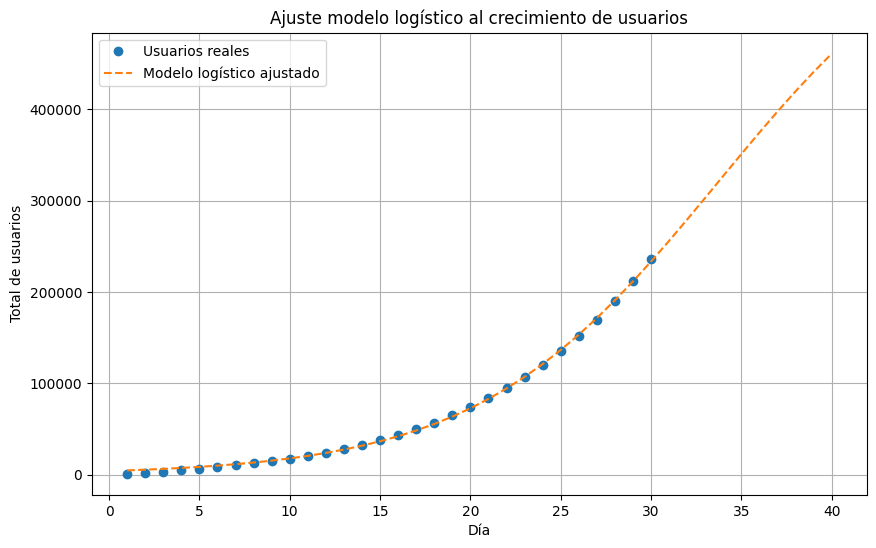

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos
days = np.array(range(1, 31))
users = np.array([
    1050, 2210, 3420, 4800, 6370, 8120, 10080, 12280, 14750, 17520,
    20640, 24160, 28130, 32600, 37640, 43320, 49720, 56910, 64980, 73980,
    83970, 94980, 107130, 120550, 135370, 151730, 169780, 189680, 211600, 235720
])

# Definir función logística
def logistic_model(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Parámetros iniciales aproximados para el ajuste
L_initial = 300000  # un poco más alto que el máximo actual
k_initial = 0.2     # tasa de crecimiento aproximada
x0_initial = 15     # punto medio en día 15

p0 = [L_initial, k_initial, x0_initial]

# Ajustar el modelo
params, covariance = curve_fit(logistic_model, days, users, p0)

L, k, x0 = params
print(f"Parámetros ajustados:\nL = {L:.2f}\nk = {k:.4f}\nx0 = {x0:.2f}")

# Predecir para días 1 a 40
future_days = np.arange(1, 41)
predicted_users = logistic_model(future_days, L, k, x0)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(days, users, 'o', label='Usuarios reales')
plt.plot(future_days, predicted_users, '--', label='Modelo logístico ajustado')
plt.xlabel('Día')
plt.ylabel('Total de usuarios')
plt.title('Ajuste modelo logístico al crecimiento de usuarios')
plt.legend()
plt.grid(True)
plt.show()


$L = 640596.42, \quad k = 0.1499, \quad x_0 = 33.72$

$f'(x_0) = \frac{L \cdot k}{4} = \frac{640596.42 \times 0.1499}{4} \approx \frac{96002.5}{4} = 24000.6$

Esto indica que en el día  33.72  la cantidad máxima de usuarios nuevos por día es aproximadamente  24000  usuarios/día.

Con base en un conjunto de datos simulado de uso de una plataforma en la nube durante 30 días, se analizó el comportamiento de las siguientes variables clave:
- Crecimiento acumulado de usuarios: Los datos muestran una tendencia creciente, que inicialmente es rápida y luego tiende a estabilizarse. Este patrón fue modelado usando una función logística, adecuada para sistemas con crecimiento limitado por capacidad.

- Tasa de nuevos usuarios: Se utilizó como aproximación de la derivada discreta de total_users, lo cual permite identificar momentos de mayor crecimiento. Esta información es útil para evaluar la carga sobre la infraestructura en distintos momentos del ciclo de vida de la plataforma.

- Relación entre usuarios activos y disponibilidad del sistema: Se graficó la relación entre usuarios activos y porcentaje de disponibilidad. La curva resultante indica que, a pesar de un aumento significativo en el número de usuarios activos, la disponibilidad se mantiene cercana al 100% con solo leves caídas ocasionales.

##Interpretación de los resultados en el contexto del problema real
Los resultados reflejan un escenario idealizado en el que una plataforma en la nube mantiene su rendimiento casi constante incluso bajo una carga creciente de usuarios. Esto sugiere que, según los datos simulados, la infraestructura subyacente está bien dimensionada o cuenta con mecanismos eficientes de escalado automático.

El análisis de nuevos usuarios como tasa de cambio permite entender la dinámica de adopción de la plataforma y anticipar cuándo pueden presentarse picos de tráfico o demanda. Esta información es crítica para planificar el aprovisionamiento de recursos y mantener una alta disponibilidad.

En cuanto a la disponibilidad, la gráfica no muestra una caída clara ni sostenida, lo cual puede interpretarse como un sistema resiliente.

##Análisis crítico de lo encontrado

- El ajuste de la función logística y el uso de derivadas permiten analizar el comportamiento dinámico de la plataforma con herramientas del cálculo diferencial.

- La interpretación de la tasa de crecimiento diario ofrece una base concreta para decisiones sobre escalabilidad y recursos de la nube.


# Conclusiones



Bibliografía

https://www.businessofapps.com/data/tik-tok-statistics/#
